In [1]:
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

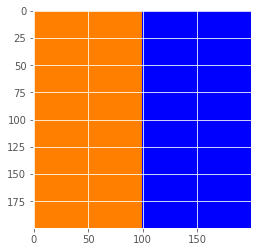

In [2]:
array = np.zeros([200, 200, 3], dtype=np.uint8)
array[:,:100] = [255, 128, 0] #Orange left side
array[:,100:] = [0, 0, 255]   #Blue right side

plt.imshow(array)

In [3]:
array.shape

(200, 200, 3)

In [4]:
array[0, 0]

array([255, 128,   0], dtype=uint8)

In [5]:
class agent():
    def __init__(self, x1 = 0, x2 = 0):
        self.x1, self.x2 = x1, x2
        self.RGB = np.random.choice(255, 3)
        
    def getCoordinates(self):
        return self.x1*10, 10+self.x1*10, self.x2*10, 10+self.x2*10
    
    def getNeighbors(self):
        neighbors = []
        for n1 in [self.x1 - 1, self.x1, self.x1 + 1]:
            for n2 in [self.x2 - 1, self.x2, self.x2 + 1]:
                if n1 >= 0 and n2 >= 0:
                    neighbors.append((n1,n2))
        neighbors.remove((self.x1, self.x2))
        return neighbors

In [6]:
uzay = agent(1, 1)
uzay.RGB

array([221, 245, 189])

In [7]:
uzay.getNeighbors()

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]

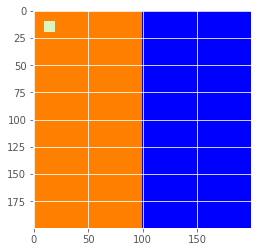

In [8]:
a,b,c,d = uzay.getCoordinates()
array[a:b, c:d] = uzay.RGB

plt.imshow(array)

In [9]:
population = {(x1,x2): agent(x1 = x1, x2 = x2) for x1 in range(20) for x2 in range(20)}

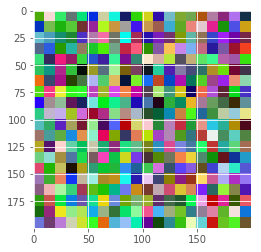

In [10]:
for x1 in range(20): 
    for x2 in range(20):
        person = population[(x1,x2)]
        
        a,b,c,d = person.getCoordinates()
        array[a:b, c:d] = person.RGB
        
plt.imshow(array) 

# Axelrod Culture Model

> The order of actions is as follows:
1) At random, pick a site to be active, and pick one of it's neighbors
2) With probability equal to their cultural similarity, these sites interact. The active site replaces one of the features on which they differ (if any) with the corresponding trait of the neighbor.

In [11]:
class agent():
    def __init__(self, x1 = 0, x2 = 0, x1_max = 20, x2_max =20):
        self.x1, self.x2 = x1, x2
        self.x1_max, self.x2_max = x1_max, x2_max
        self.RGB = np.random.choice(255, 3)
        
    def getCoordinates(self):
        return self.x1*10, 10+self.x1*10, self.x2*10, 10+self.x2*10
    
    def getNeighbors(self, k):
        neighbors = []
        for n1 in [self.x1 - 1, self.x1, self.x1 + 1]: # range(self.x1-k,self.x1+ k + 1):
            for n2 in [self.x2 - 1, self.x2, self.x2 + 1]: # range(self.x2-k,self.x2+ k + 1):
                if n1 >= 0 and n2 >= 0 and n1 < self.x1_max and n2 < self.x2_max:
                    neighbors.append((n1,n2))
        neighbors.remove((self.x1, self.x2))
        return neighbors
    
    def similar(self, other_agent, th = 30):
        # 255 - distance
        return np.mean(np.abs(self.RGB - other_agent.RGB)) < th
    
    def immitate(self, other_agent):
        i = np.random.choice(3)
        self.RGB[i] = other_agent.RGB[i]
    
    def selectOneNeigbor(self, k = 1):
        neighbors = self.getNeighbors(k)
        N = len(neighbors)
        return neighbors[np.random.choice(N)]
        

In [12]:
class culture():
    def __init__(self, N1, N2):
        self.N1, self.N2 = N1, N2
        self.population = {(x1,x2): agent(x1 = x1, x2 = x2, x1_max = self.N1, x2_max =self.N2) 
                           for x1 in range(self.N1) for x2 in range(self.N2)}
 
    def selectOneAgent(self):
        IDs = self.population.keys()
        one_idx = np.random.choice(len(IDs))
        
        return list(IDs)[one_idx]
    
    def run(self, time = 1000, threshold = 50):
        for i in range(time):
            A_index = self.selectOneAgent()
            A = self.population[A_index]

            B_index = A.selectOneNeigbor(k = 1)
            B = self.population[B_index]

            if A.similar(B, threshold):
                A.immitate(B) 
        
    def drawBoard(self):
        array = np.zeros([10 * self.N1, 10 * self.N2, 3], dtype=np.uint8)
        
        for x1 in range(self.N1): 
            for x2 in range(self.N2):
                person = self.population[(x1,x2)]

                a,b,c,d = person.getCoordinates()
                array[a:b, c:d] = person.RGB

        plt.imshow(array) 

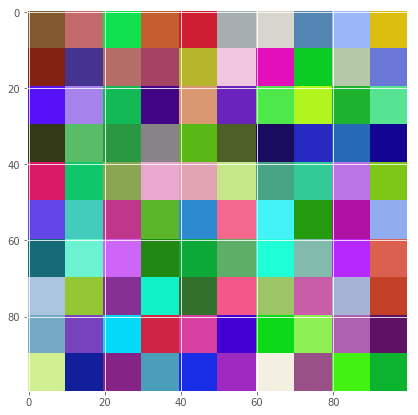

In [14]:
plt.figure(figsize=(7,7))

world = culture(N1 = 10, N2 =10)
world.drawBoard()

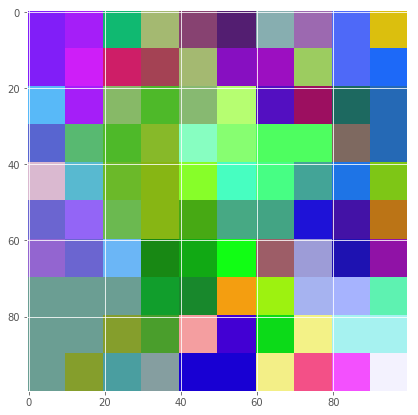

In [15]:
plt.figure(figsize=(7,7))

world.run(time = 1000, threshold = 100)
world.drawBoard()

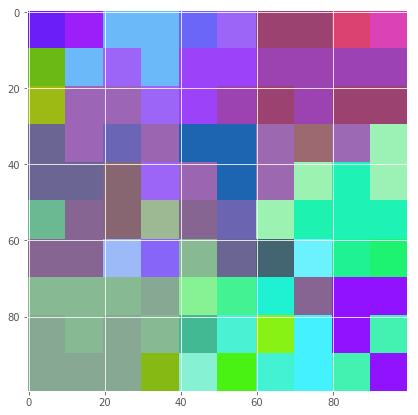

In [16]:
plt.figure(figsize=(7,7))

world.run(time = 5000, threshold = 100)
world.drawBoard()

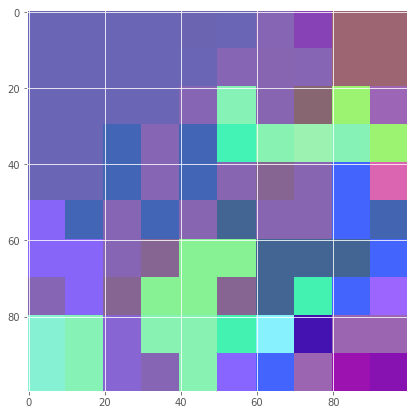

In [17]:
plt.figure(figsize=(7,7))

world.run(time = 5000, threshold = 100)
world.drawBoard()

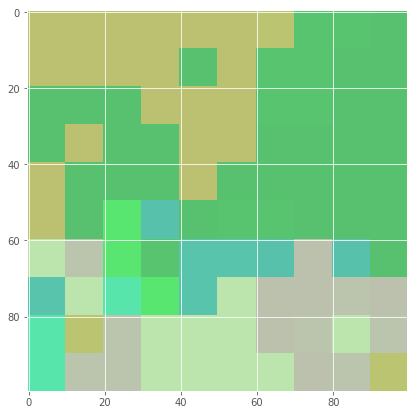

In [46]:
plt.figure(figsize=(7,7))

world.run(time = 5000, threshold = 100)
world.drawBoard()

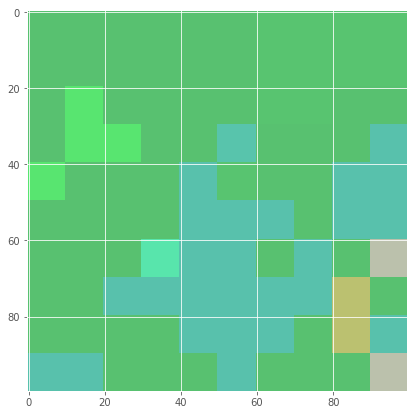

In [47]:
plt.figure(figsize=(7,7))

world.run(time = 5000, threshold = 100)
world.drawBoard()

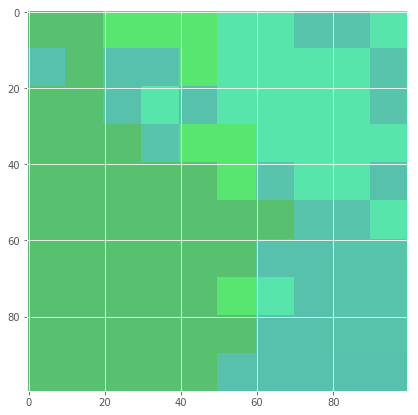

In [48]:
plt.figure(figsize=(7,7))

world.run(time = 5000, threshold = 100)
world.drawBoard()

# deneme

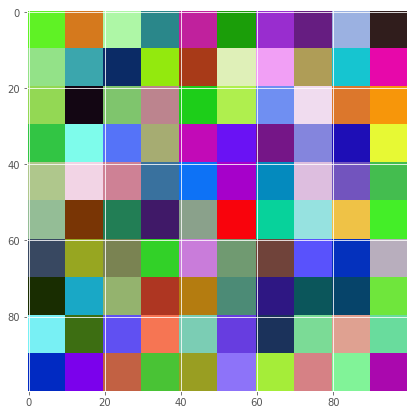

In [55]:
plt.figure(figsize=(7,7))

world = culture(N1 = 10, N2 =10)
world.drawBoard()

In [56]:
[human.x1 for human in world.population]

AttributeError: 'tuple' object has no attribute 'x1'